In [ ]:
import pandas as pd

## Loading Dataset

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')

## Exploring Dataset

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## checking for duplicate records

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
df['lunch'].value_counts()

,count
lunch,
standard,645
free/reduced,355


In [ ]:
df['parental level of education'].value_counts()

,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [ ]:
df['race/ethnicity'].value_counts()

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


In [ ]:
df['test preparation course'].value_counts()

,count
test preparation course,
none,642
completed,358


,count
math score,
65,36
62,35
69,32
59,32
73,27
...,...
24,1
26,1
19,1


NameError: name 'plt' is not defined

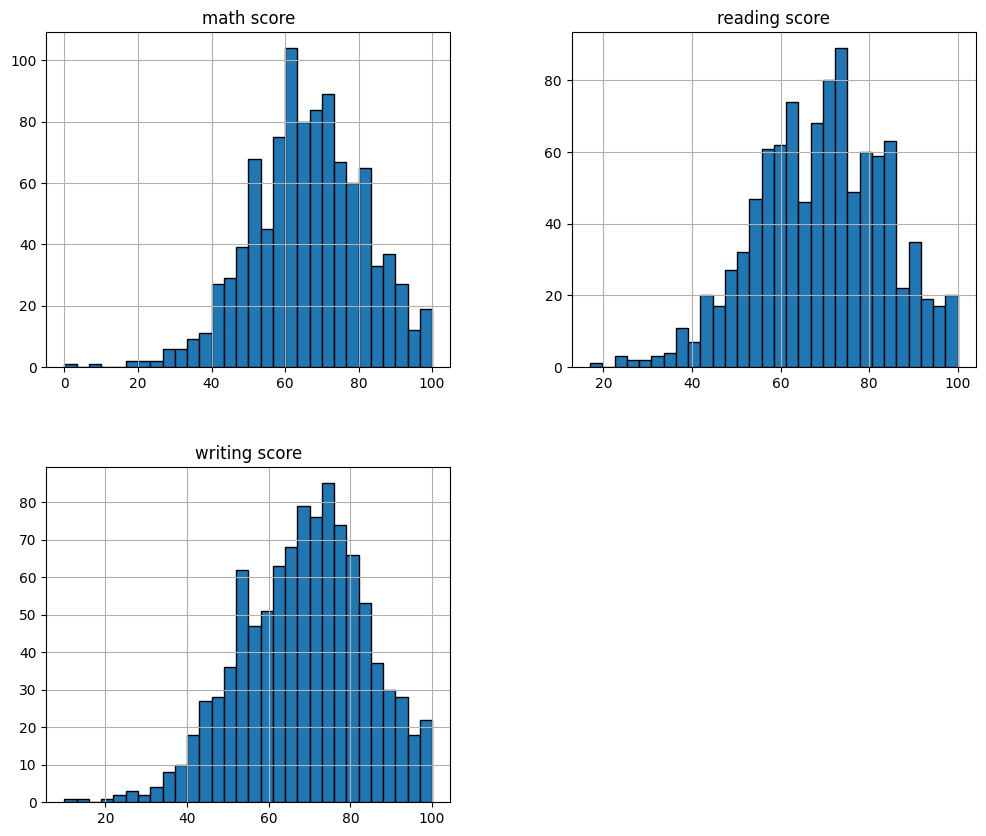

In [ ]:
df.hist(bins=30, figsize = (12,10), edgecolor = 'black')
plt.suptitle("Histograms of Features", fontsize=16)
plt.tight_layout()
plt.show()

<Axes: >

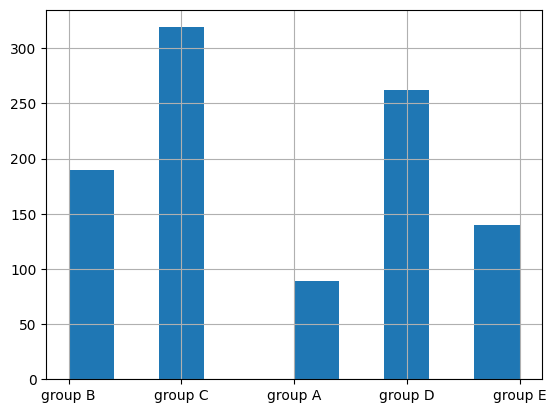

In [ ]:
df['race/ethnicity'].hist()

In [ ]:
import seaborn as sns

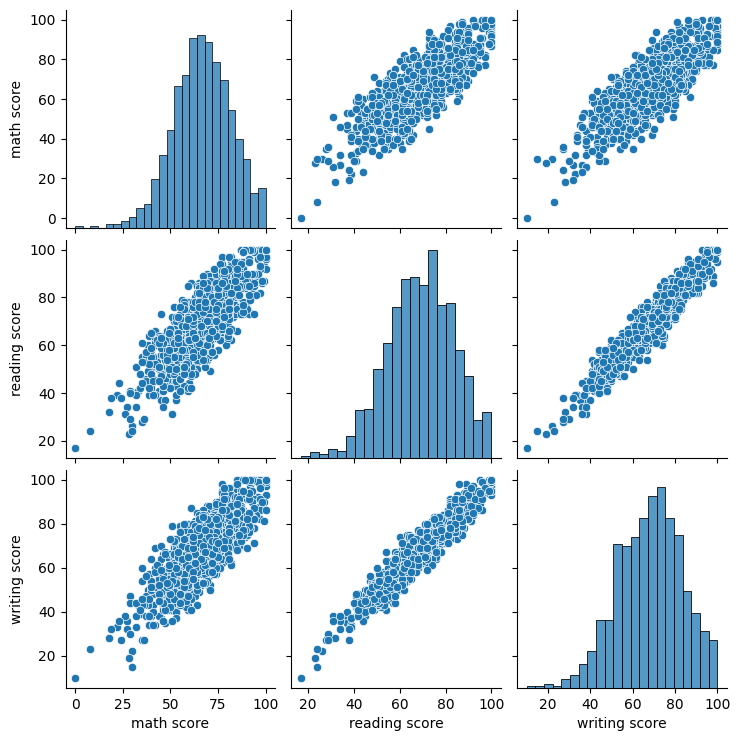

In [ ]:
sns.pairplot(df)

In [ ]:
df_copy = df.copy()

## Ordinal encoding

In [ ]:
df_copy['parental level of education'].value_counts()

,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


## Education Level	Ordinal Value
some high school -->	0

high school -->	1

some college -->	2

associate's degree --> 3

bachelor's degree -->	4

master's degree -->	5

In [ ]:
education_mapping = {
    "some college"	: 2,
    "associate's degree" : 3,
    "high school"	: 1,
    "some high school" : 0,
    "bachelor's degree":	4,
    "master's degree":	5
    }
df_copy['parental level of education'] = df_copy['parental level of education'].map(education_mapping)

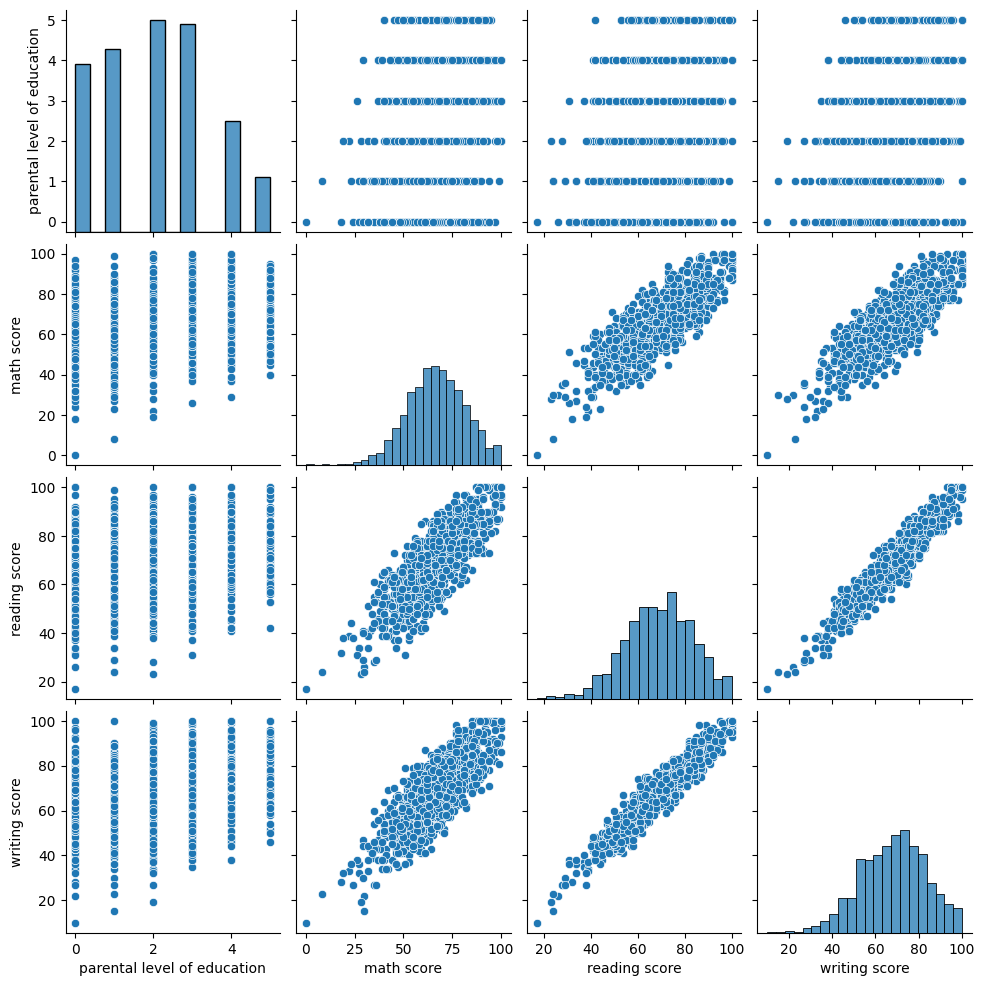

In [ ]:
sns.pairplot(df_copy)

## Binary encoding

In [ ]:
test_mapping ={
    'none':0,
    'completed':1
}
df_copy['test preparation course'] = df_copy['test preparation course'].map(test_mapping)

In [ ]:
lunch_mapping = {
    'standard':0,
    'free/reduced':1
}
df_copy['lunch'] = df_copy['lunch'].map(lunch_mapping)

In [ ]:
gender_mapping = {
    'male':0,
    'female':1
}
df_copy['gender'] = df_copy['gender'].map(gender_mapping)

## one-hot encoding

<Axes: >

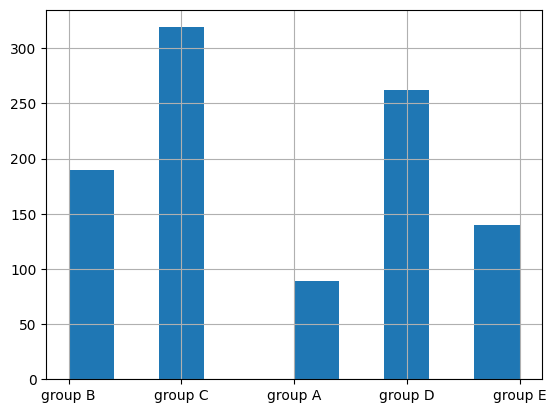

In [ ]:
df['race/ethnicity'].hist()

In [ ]:
df_encoded =pd.get_dummies(df_copy, columns = ['race/ethnicity'], drop_first = False)

In [ ]:
df_copy.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,4,0,0,72,72,74
1,female,group C,2,0,1,69,90,88
2,female,group B,5,0,0,90,95,93
3,male,group A,3,1,0,47,57,44
4,male,group C,2,0,0,76,78,75


In [ ]:
df_encoded.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,1,4,0,0,72,72,74,False,True,False,False,False
1,1,2,0,1,69,90,88,False,False,True,False,False
2,1,5,0,0,90,95,93,False,True,False,False,False
3,0,3,1,0,47,57,44,True,False,False,False,False
4,0,2,0,0,76,78,75,False,False,True,False,False


## Correlation Matrix

In [ ]:
df_encoded.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E'],
      dtype='object')

## Multiple linear Regression

> Add blockquote



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_encoded.corr()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
gender,1.000000,0.043934,0.021372,-0.006028,-0.167982,0.244313,0.301225,-0.071001,0.028466,0.063368,-0.030566,-0.020302
parental level of education,0.043934,1.000000,0.023259,-0.007143,0.159432,0.190908,0.236715,-0.063061,-0.070537,0.039925,0.015235,0.058563
lunch,0.021372,0.023259,1.000000,0.017044,-0.350877,-0.229560,-0.245769,0.032329,0.008257,0.003385,0.009458,-0.052398
test preparation course,-0.006028,-0.007143,0.017044,1.000000,0.177702,0.241780,0.312946,-0.006315,-0.000106,0.012522,-0.055956,0.059393
math score,-0.167982,0.159432,-0.350877,0.177702,1.000000,0.817580,0.802642,-0.091977,-0.084250,-0.073387,0.050071,0.205855
reading score,0.244313,0.190908,-0.229560,0.241780,0.817580,1.000000,0.954598,-0.096274,-0.060283,-0.003074,0.035177,0.106712
writing score,0.301225,0.236715,-0.245769,0.312946,0.802642,0.954598,1.000000,-0.110714,-0.078254,-0.010203,0.082032,0.089077
race/ethnicity_group A,-0.071001,-0.063061,0.032329,-0.006315,-0.091977,-0.096274,-0.110714,1.000000,-0.151381,-0.213923,-0.186234,-0.126110
race/ethnicity_group B,0.028466,-0.070537,0.008257,-0.000106,-0.084250,-0.060283,-0.078254,-0.151381,1.000000,-0.331479,-0.288574,-0.195411
race/ethnicity_group C,0.063368,0.039925,0.003385,0.012522,-0.073387,-0.003074,-0.010203,-0.213923,-0.331479,1.000000,-0.407797,-0.276145


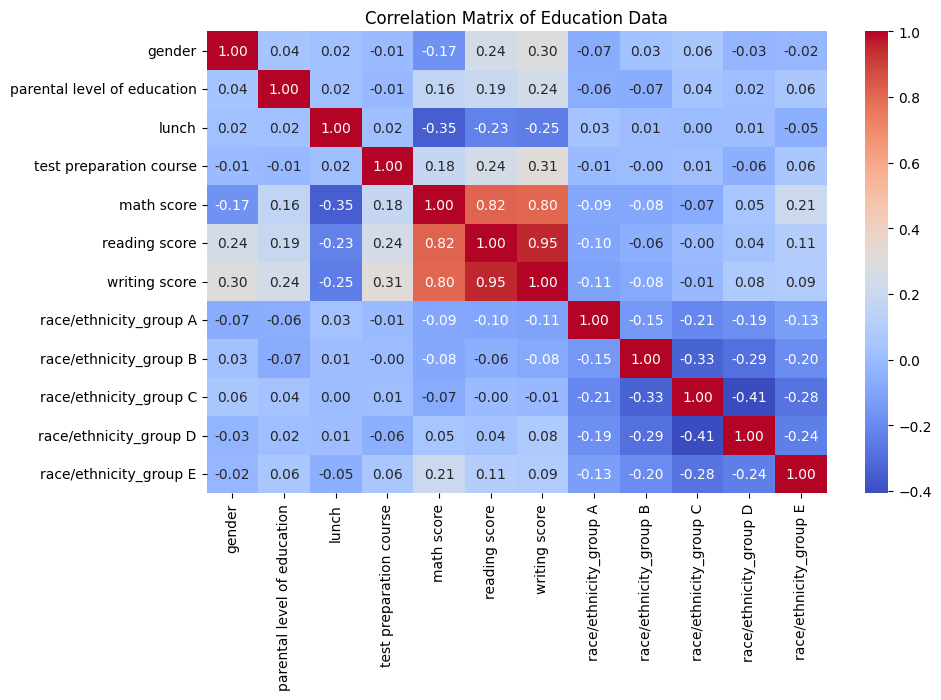

In [ ]:
num = [
    'gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score','race/ethnicity_group A', 'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E'
]
corr = df_encoded[num].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Education Data')
plt.show()

## Insights

 ### Feature	Correlation with math score

reading score	0.8176 ✅ strong

writing score	0.8026 ✅ strong

test preparation course	0.1777 ✅ mild

parental level of education	0.1594 ✅ mild

race/ethnicity_group E	0.2059 ✅ mild

lunch	-0.3509 ✅ moderate neg

race/ethnicity_group D	0.0501 ❌ weak

race/ethnicity_group C	-0.0734 ❌ weak

race/ethnicity_group B	-0.0843 ❌ weak

race/ethnicity_group A	-0.0920 ❌ weak

gender	-0.1680 ❌ low/mild neg

# Multilinear Regression

In [ ]:
X = df_encoded.drop(columns = ['math score'])
y = df_encoded['math score']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
import numpy as np

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,gender,parental level of education,lunch,test preparation course,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
29,1,5,0,0,70,75,False,False,False,True,False
535,1,4,1,1,83,83,False,False,True,False,False
695,1,2,1,0,89,86,False,False,False,True,False
557,0,5,1,0,67,66,False,False,True,False,False
836,0,1,0,0,64,57,False,False,False,False,True


Since we are working with a model which uses gradient based optisations for this to work we must stardise the data !

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train.head()

,gender,parental level of education,lunch,test preparation course,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
29,1,5,0,0,70,75,False,False,False,True,False
535,1,4,1,1,83,83,False,False,True,False,False
695,1,2,1,0,89,86,False,False,False,True,False
557,0,5,1,0,67,66,False,False,True,False,False
836,0,1,0,0,64,57,False,False,False,False,True


In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared Score on test data: {r2:.4f}")



R-squared Score on test data: 0.8816


In [ ]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]     # number of samples
p = X_test.shape[1]     # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"✅ R² Score: {r2:.4f}")
print(f"✅ Adjusted R² Score: {adjusted_r2:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")

✅ R² Score: 0.8816
✅ Adjusted R² Score: 0.8746
📉 Mean Absolute Error (MAE): 4.1820
📉 Root Mean Squared Error (RMSE): 5.3685


## My predictions are off by approximately 5 units.

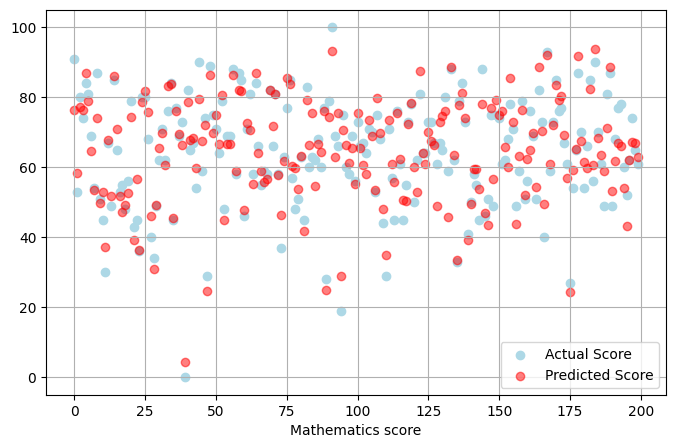

In [ ]:
feature_index = 0
X_plot = X_test.iloc[:, feature_index]
plt.figure(figsize=(8, 5))
plt.scatter(x_axis, y_test.values, color='lightblue', label='Actual Score')
plt.scatter( x_axis,y_pred, color='red', alpha=0.5, label='Predicted Score')
plt.xlabel('Mathematics score')
plt.ylabel('')
plt.title('')
plt.legend()
plt.grid(True)
plt.show()

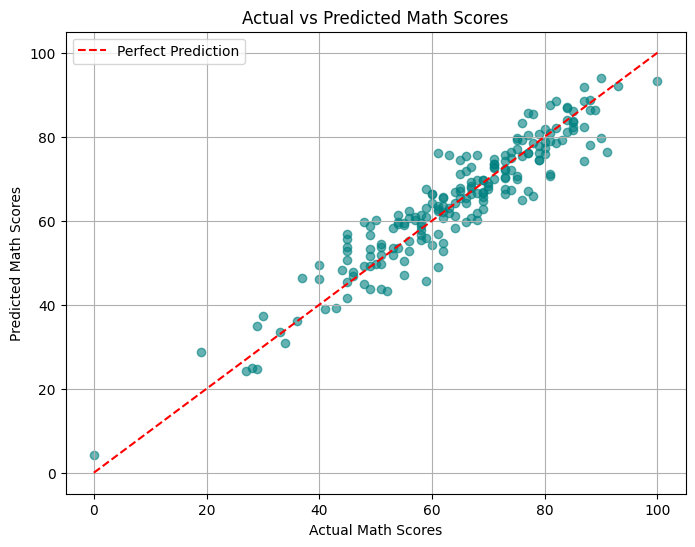

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Math Scores')
plt.ylabel('Predicted Math Scores')
plt.title('Actual vs Predicted Math Scores')
plt.legend()
plt.grid(True)
plt.show()

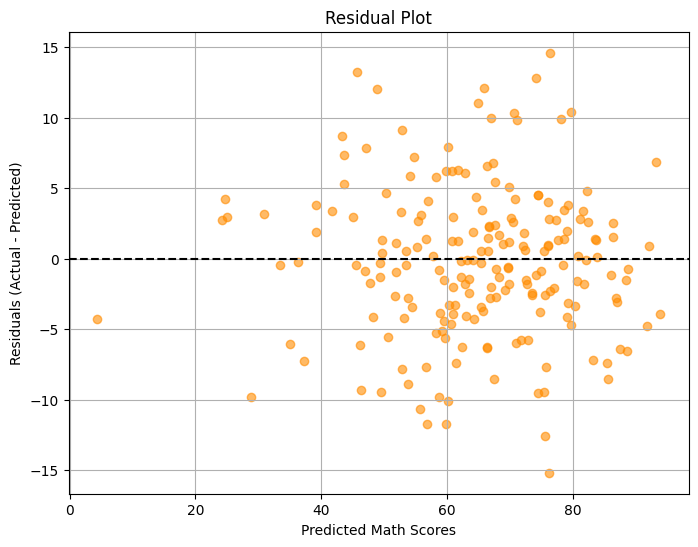

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='darkorange', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Math Scores')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Conclusion
##Random scatter ---> good

##Patterns --> potential problems

## Addressing Multicolinearity
### reading and writing could be strong predictors for my model however they are highly correlated to each other as well resulting in colinearity to tackle this i am going to introduce a new feature 'avg_literacy_score' which will be basically avg of these two !

> Add blockquote



Feature Engineering

In [ ]:
df_encoded["avg_literacy_score"] = (df["reading score"] + df["writing score"]) / 2

In [ ]:
X = df_encoded.drop(columns=['math score', 'reading score', 'writing score'])
y = df_encoded['math score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [ ]:
X.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'race/ethnicity_group A',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'avg_literacy_score'],
      dtype='object')

In [ ]:
X_train.head()

,gender,parental level of education,lunch,test preparation course,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,avg_literacy_score
147,0,3,1,0,False,False,True,False,False,67.0
88,1,2,0,0,True,False,False,False,False,68.5
731,0,0,1,0,True,False,False,False,False,44.5
741,1,3,1,0,True,False,False,False,False,56.5
36,1,3,0,0,False,False,False,True,False,82.0


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared Score on test data: {r2:.4f}")


R-squared Score on test data: 0.8649


In [ ]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]     # number of samples
p = X_test.shape[1]     # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"✅ R² Score: {r2:.4f}")
print(f"✅ Adjusted R² Score: {adjusted_r2:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")

✅ R² Score: 0.8649
✅ Adjusted R² Score: 0.8578
📉 Mean Absolute Error (MAE): 4.4222
📉 Root Mean Squared Error (RMSE): 5.5112


## Conclusion
While addressing multicollinearity led to a minor decrease in raw predictive accuracy (R² decreased by ~1.7%, MAE increased by ~0.24 units), this trade-off is beneficial for the overall model quality. The model remains highly accurate, with average predictions typically off by approximately 4-5 units for a target range of 1-100, which is still considered very good performance. Critically, resolving multicollinearity ensures the model's coefficients are more stable and interpretable, providing more reliable insights into the relationships between predictors and the target variable. This makes the "after" model a more robust and statistically sound solution.

## Selecting only Relevent Features
droping the features with least predicting power like race and gender !
and eliminating colinearity !

In [ ]:
df_f = df_encoded.drop(columns = ['gender', 'race/ethnicity_group A', 'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E'])

In [ ]:
df_f.head()

,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_literacy_score
0,4,0,0,72,72,74,73.0
1,2,0,1,69,90,88,89.0
2,5,0,0,90,95,93,94.0
3,3,1,0,47,57,44,50.5
4,2,0,0,76,78,75,76.5


In [ ]:
X = df_f.drop(columns=['math score', 'reading score', 'writing score'])
y = df_f['math score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared Score on test data: {r2:.4f}")


R-squared Score on test data: 0.6646


In [ ]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]     # number of samples
p = X_test.shape[1]     # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"✅ R² Score: {r2:.4f}")
print(f"✅ Adjusted R² Score: {adjusted_r2:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")

✅ R² Score: 0.6646
✅ Adjusted R² Score: 0.6577
📉 Mean Absolute Error (MAE): 7.3130
📉 Root Mean Squared Error (RMSE): 8.6849


# Polynomial Linear Regression

## we can't use binary features and categorigal for polynomial so lets drop those

In [ ]:
df_new = df_encoded.drop(columns = ['gender', 'race/ethnicity_group A', 'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E', 'lunch', 'test preparation course'])

In [ ]:
df_new.head()

,parental level of education,math score,reading score,writing score,avg_literacy_score
0,4,72,72,74,73.0
1,2,69,90,88,89.0
2,5,90,95,93,94.0
3,3,47,57,44,50.5
4,2,76,78,75,76.5




---



In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = df_new.drop(columns=['math score'])
y = df_new['math score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_poly)

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared Score on test data: {r2:.4f}")


R-squared Score on test data: 0.6832


In [ ]:
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]     # number of samples
p = X_test.shape[1]     # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"✅ R² Score: {r2:.4f}")
print(f"✅ Adjusted R² Score: {adjusted_r2:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")

✅ R² Score: 0.6832
✅ Adjusted R² Score: 0.6767
📉 Mean Absolute Error (MAE): 7.4106
📉 Root Mean Squared Error (RMSE): 8.7799


In [ ]:
df_new.head()

,parental level of education,math score,reading score,writing score,avg_literacy_score
0,4,72,72,74,73.0
1,2,69,90,88,89.0
2,5,90,95,93,94.0
3,3,47,57,44,50.5
4,2,76,78,75,76.5


In [ ]:
X = df_new.drop(columns=['math score'])
y = df_new['math score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias= False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_poly)

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared Score on test data: {r2:.4f}")


R-squared Score on test data: 0.6832


In [ ]:
poly = PolynomialFeatures(degree= 3 )
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_poly)

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared Score on test data: {r2:.4f}")


R-squared Score on test data: 0.6862


In [ ]:
df_encoded

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,avg_literacy_score
0,1,4,0,0,72,72,74,False,True,False,False,False,73.0
1,1,2,0,1,69,90,88,False,False,True,False,False,89.0
2,1,5,0,0,90,95,93,False,True,False,False,False,94.0
3,0,3,1,0,47,57,44,True,False,False,False,False,50.5
4,0,2,0,0,76,78,75,False,False,True,False,False,76.5


In [ ]:
X = df_encoded.drop(columns=['math score'])
y = df_encoded['math score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
poly = PolynomialFeatures(degree= 2 )
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_poly)

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared Score on test data: {r2:.4f}")


R-squared Score on test data: 0.8725


In [ ]:
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]     # number of samples
p = X_test.shape[1]     # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"✅ R² Score: {r2:.4f}")
print(f"✅ Adjusted R² Score: {adjusted_r2:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")

✅ R² Score: 0.8725
✅ Adjusted R² Score: 0.8643
📉 Mean Absolute Error (MAE): 4.3502
📉 Root Mean Squared Error (RMSE): 5.5710
